In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("Ecommerce Customers")

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.empty

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [20]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


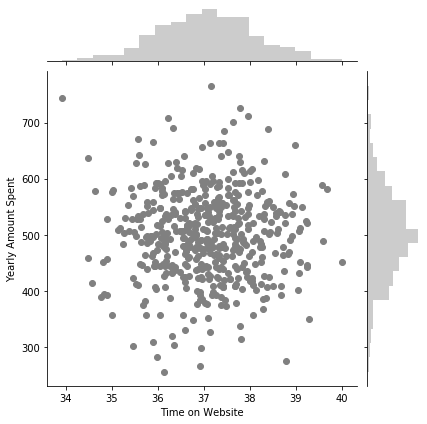

In [19]:
# create a jointplot of website and yearly amount spent 
sns.jointplot(data = df, x = "Time on Website" , y = "Yearly Amount Spent" , color = "grey" )

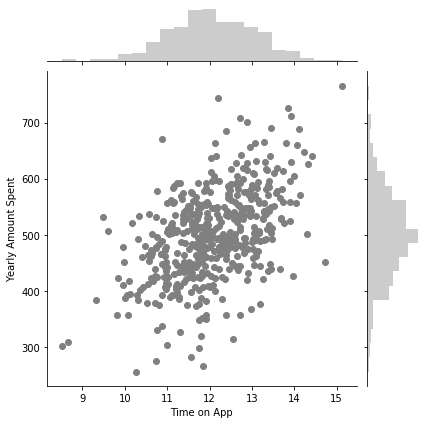

In [21]:
sns.jointplot(data = df, x = "Time on App" , y = "Yearly Amount Spent" , color = "grey" )

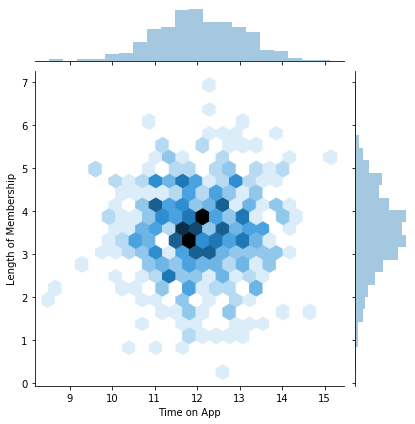

In [22]:
# jointplot comparing time on app and lenght of meambership 

sns.jointplot(data= df, x = "Time on App", y = "Length of Membership", kind = "hex"  )

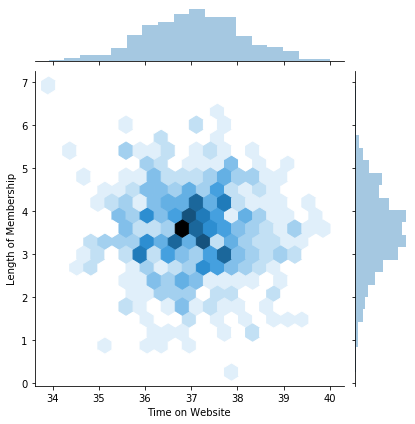

In [23]:
# jointplot comparing time on web and lenght of meambership 

sns.jointplot(data= df, x = "Time on Website", y = "Length of Membership", kind = "hex"  )

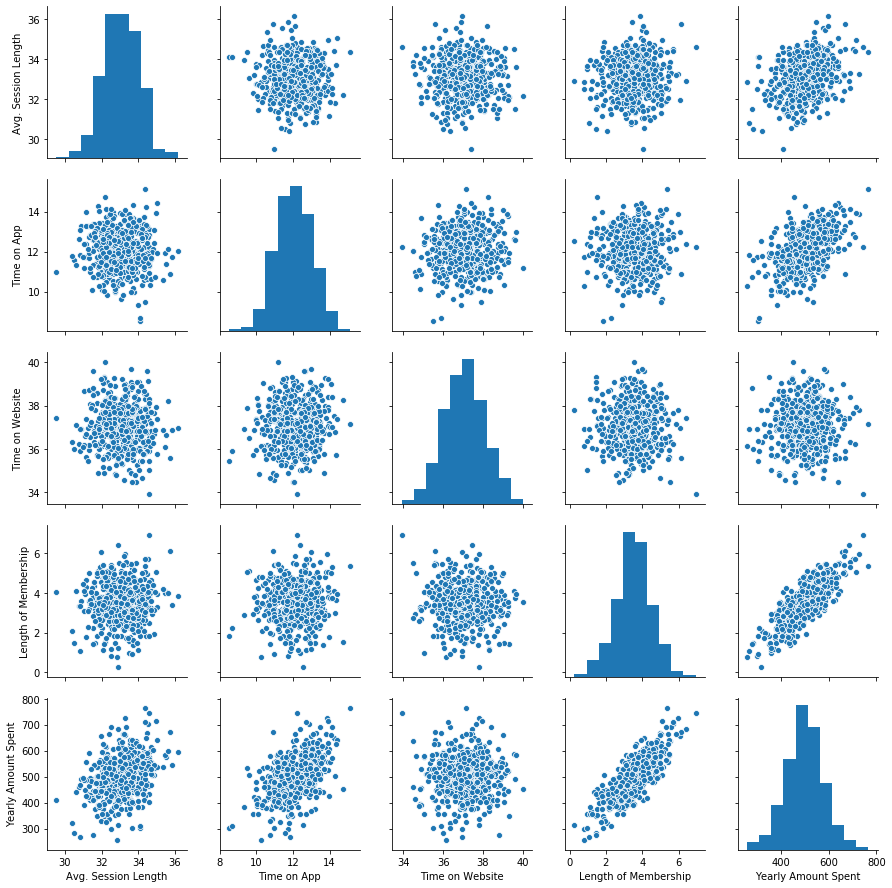

In [24]:
# create a pairplot 
sns.pairplot(data = df)

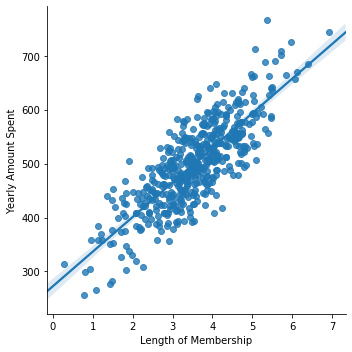

In [27]:
# based on the visual, we have seen that most of the corelated with yearly amount spent are Lenght of meambership

sns.lmplot(data = df, x = "Length of Membership", y = "Yearly Amount Spent" )

# training and testing data 

In [28]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [30]:
X  = df[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership' ]]

In [31]:
y = df['Yearly Amount Spent']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(lm.coef_) # coefficients

[25.98154972 38.59015875  0.19040528 61.27909654]


In [40]:
# predictic

In [42]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'prediction')

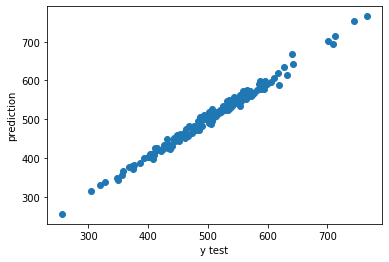

In [45]:
plt.scatter(y_test, prediction )
plt.xlabel("y test")
plt.ylabel("prediction")

In [46]:
# evaluvating the module

In [47]:
from sklearn import metrics

In [57]:
print("MAE", metrics.mean_absolute_error(y_test, prediction) )
print("MSE", metrics.mean_squared_error(y_test, prediction))


MAE 7.228148653430835
MSE 79.81305165097443


In [58]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE 8.933815066978633


In [62]:
metrics.explained_variance_score(y_test, prediction ,sample_weight=None, multioutput='uniform_average')

0.9890771231889606

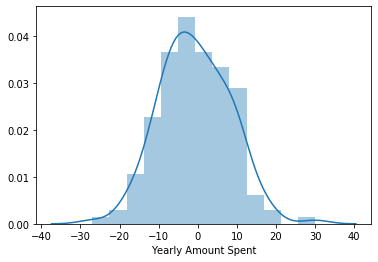

In [63]:
#
sns.distplot(y_test-prediction)

In [65]:
pd.DataFrame(lm.coef_,X.columns, columns=["coef_"])

,coef_
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
